# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic>ссылке</a>.

Кстати, здесь же есть много готовых решений нашей задачи. Решение можно посмотреть в разделе <a href=https://www.kaggle.com/c/titanic/code>code на kaggle</a>.

Некоторые решения, которые уже есть:
https://www.kaggle.com/hacktech33/titanic-solution-xgboost (простое решение)

https://www.kaggle.com/shrutijhaa/in-top-3-titanic-machine-learning-from-disaster (возможно, слишком много визуализации, но хорошее качество)

https://www.kaggle.com/blackhurt/top-3-using-voting-classifier (сильное решение, использует метод простого голосования трёх сильных моделей)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [115]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [116]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [118]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [119]:
total_male = data['Sex'].value_counts()['male']
total_female = data['Sex'].value_counts()['female']
surv_male = data[data['Sex']=='male']["Survived"].value_counts()[1]
surv_female = data[data['Sex']=='female']["Survived"].value_counts()[1]

print(f"Всего мужчин на борту: {total_male}")
print(f"Всего женщин на борту: {total_female}")

print(f"Мужчин выжило: {surv_male}")
print(f"Женщин выжило: {surv_female}")
print()
print(f"Доля выживших мужчин: {surv_male/total_male}")
print(f"Доля выживших женщин: {surv_female/total_female}")
print()


Всего мужчин на борту: 577
Всего женщин на борту: 314
Мужчин выжило: 109
Женщин выжило: 233

Доля выживших мужчин: 0.18890814558058924
Доля выживших женщин: 0.7420382165605095



Вывод: процент выживаемости среди женщин выше чем среди мужчин. Однако на борту распределение между женщинами и мужчинами было смещено в сторону мужского пола

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

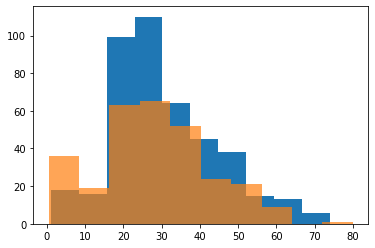

In [120]:
plt.hist(data[data['Survived']==0]['Age'])
plt.hist(data[data['Survived']==1]['Age'], alpha = 0.7)

Как видно из гистограмм, распределения частот по возрасту для выживших и невыживших совпадают.

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [121]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [122]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [123]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [124]:
data_full = data.copy()

In [125]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data_full['cabin_type'] = data_full.apply(get_cabin_letter, axis=1)

Сюда добавьте описание вашего нового признака

In [126]:
def compute_my_feature(row): #rename this function appropriately
    x = row['Name'].split(',')[1].split('.')[0][1:]
    return x

data_full['title'] = data_full.apply(compute_my_feature, axis=1)
data_full['title'].replace({'Mr':1,'Miss':2,'Mrs':2,'Master':3,'Dr':4,'Rev':5},inplace=True)
data_full['title'].replace(['Major','Mlle','Col','Don','the Countess','Sir','Capt','Mme','Lady','Jonkheer','Ms'],6,inplace=True)

In [127]:
data_full

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,title
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,2
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,2
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0,5
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,2
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,0,2


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [128]:
data_full = pd.get_dummies(data_full, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'cabin_type', 'title'], drop_first=True)

In [129]:
data_full

,Name,Age,Ticket,Fare,Cabin,Survived,Pclass_2,Pclass_3,Sex_male,SibSp_1,...,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T,title_2,title_3,title_4,title_5,title_6
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",27.0,211536,13.0000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
888,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,B42,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
889,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.4500,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [130]:
data_full = data_full.drop(['Name', 'Ticket', 'Cabin'], axis=1)

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [131]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()
le_Embarked = LabelEncoder()

data_train['Sex'] = le_Sex.fit_transform(data_train['Sex'])
data_train['Embarked'] = le_Embarked.fit_transform(data_train['Embarked'])
data_test['Sex'] = le_Sex.transform(data_test['Sex'])
data_test['Embarked'] = le_Embarked.transform(data_test['Embarked'])

In [132]:
data_train = data_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data_test = data_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(neigh, data_train.drop(['Survived'],axis=1), data_train['Survived'], cv=10, scoring='accuracy')
print(scores.mean())

0.6951100870455709


### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [162]:
data_train_full, data_test_full = train_test_split(data_full, test_size=0.3)

In [141]:
neigh_with_full = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(neigh, data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'], cv=10, scoring='accuracy')
print(scores.mean())

0.7253456221198158


Качество немного выросло

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

Логистическая регрессия:

In [184]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'])
scores = cross_val_score(clf, data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'], cv=10, scoring='accuracy')
print(scores.mean())

0.8219150025601637


Случайный лес:

In [176]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion='entropy', n_estimators=100)
clf.fit(data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'])
scores = cross_val_score(clf, data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'], cv=10, scoring='accuracy')
print(scores.mean())

0.7961085509472606


Поиск оптимального значения для Решающего дерева (*n_estimators*, *max_depth*)

In [165]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_depth':[2,5,10,20,50], 
     'n_estimators':[10, 25, 50, 100, 150]
    }
]

reg = RandomForestClassifier()
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = 'accuracy', verbose=2)
grid_search.fit(data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=25; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 5, 10, 20, 50],
                          'n_estimators': [10, 25, 50, 100, 150]}],
             scoring='accuracy', verbose=2)

In [166]:
print('GridSearchCV Best Params:', grid_search.best_params_)

GridSearchCV Best Params: {'max_depth': 10, 'n_estimators': 25}


## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [185]:
clf=RandomForestClassifier(criterion='entropy', n_estimators=25, max_depth=10)
clf.fit(data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'])
scores = cross_val_score(clf, data_train_full.drop(['Survived'],axis=1), data_train_full['Survived'], cv=10, scoring='accuracy')
print(scores.mean())

0.8250128008192524


In [186]:
y_test = clf.predict(data_test_full.drop(['Survived'], axis=1))

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(data_test_full['Survived'], y_test)

0.8097014925373134

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

Добавление признаков улучшило результаты предсказания. 
Наилучший результат дал алгоритм случайного леса, после нахождения оптимальных параметров